In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def load_images_from_folder(folder_path):
    images = []
    for file_name in os.listdir(folder_path):
        image = cv2.imread(os.path.join(folder_path, file_name), cv2.IMREAD_GRAYSCALE)
        if image is not None:
            images.append(image)
    return images

In [3]:
# Load the data using the function
suprise_images_path = 'Data/images/surprise'
happy_images_path = 'Data/images/happy'

superise_images = load_images_from_folder(suprise_images_path)
happy_images = load_images_from_folder(happy_images_path)

In [12]:
Image_shape = superise_images[0].shape
print('Image shape:', Image_shape)

Image shape: (600, 300)


In [5]:
# Select 50 images from each class as training data randomly
np.random.shuffle(superise_images)
np.random.shuffle(happy_images)

train_superise_images = superise_images[:50]
train_happy_images = happy_images[:50]

test_superise_images = superise_images[50:]
test_happy_images = happy_images[50:]


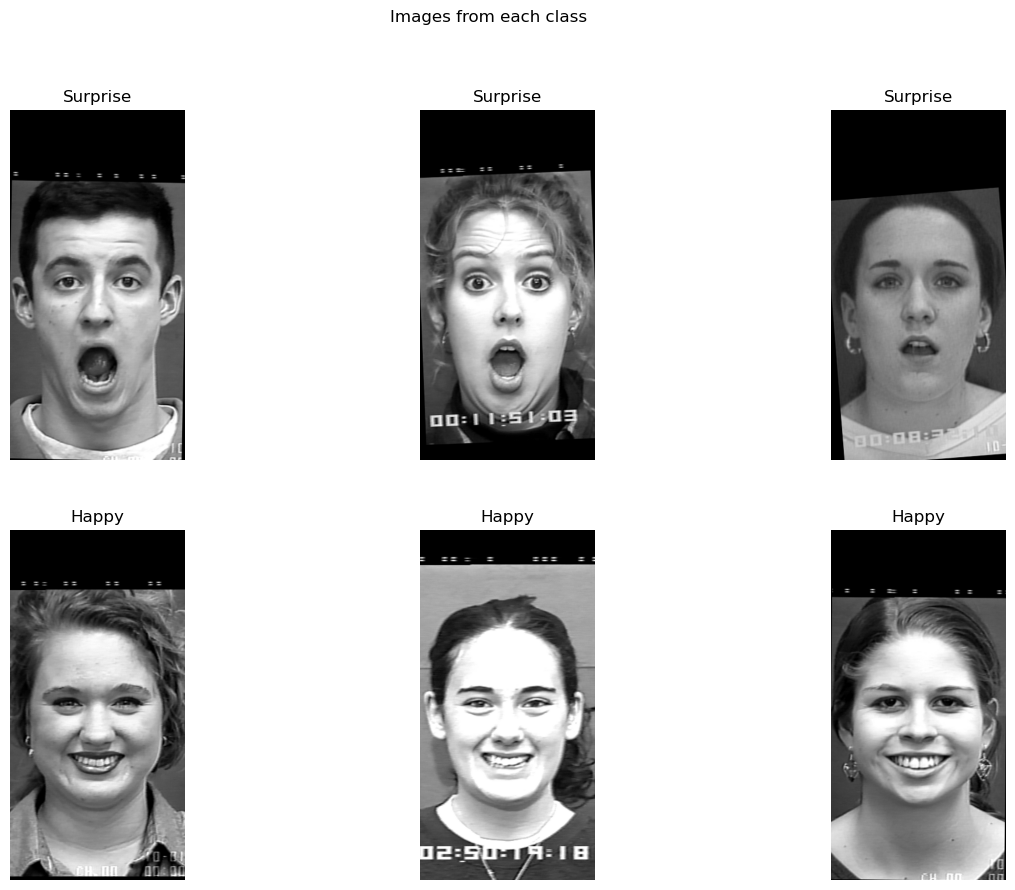

In [6]:
# Plot 3 images from each class
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Images from each class')
for i in range(3):
    axs[0, i].imshow(cv2.cvtColor(train_superise_images[i], cv2.COLOR_BGR2RGB))
    axs[0, i].set_title('Surprise')
    axs[0, i].axis('off')

    axs[1, i].imshow(cv2.cvtColor(train_happy_images[i], cv2.COLOR_BGR2RGB))
    axs[1, i].set_title('Happy')
    axs[1, i].axis('off')
    

In [47]:
# Train PCA on the training data
train_superise_images = np.array(train_superise_images)
train_happy_images = np.array(train_happy_images)

train_superise_images = train_superise_images.reshape(train_superise_images.shape[0], -1)
train_happy_images = train_happy_images.reshape(train_happy_images.shape[0], -1)

test_happy_images = np.array(test_happy_images)
test_superise_images = np.array(test_superise_images)

test_happy_images = test_happy_images.reshape(test_happy_images.shape[0], -1)
test_superise_images = test_superise_images.reshape(test_superise_images.shape[0], -1)

# Concatenate the two classes
train_data = np.concatenate((train_superise_images, train_happy_images), axis=0)

pca = PCA(n_components=50)
pca.fit(train_data)

PCA(n_components=50)

In [10]:
def project_reconstruct_images(images, pca):
    images = np.array(images)
    images = images.reshape(images.shape[0], -1)
    projected_images = pca.transform(images)
    reconstructed_images = pca.inverse_transform(projected_images)
    return reconstructed_images 

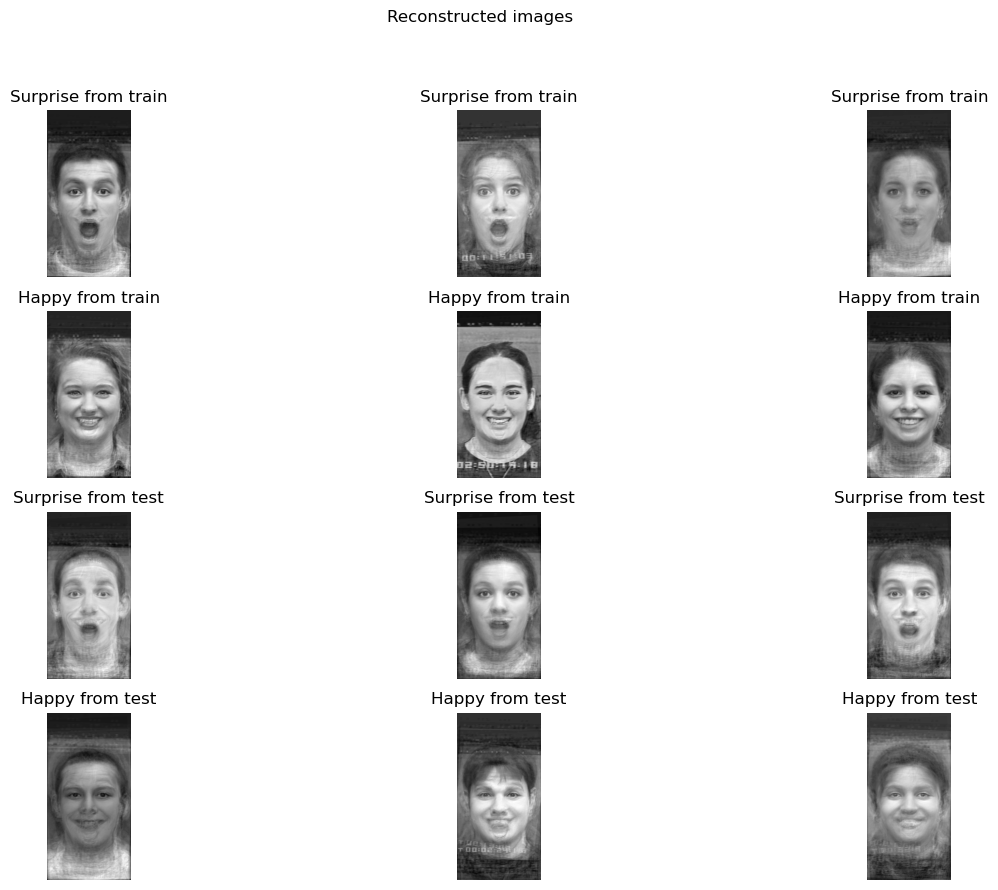

In [13]:
# Some images from train and test data
train_superise_reconstructed = project_reconstruct_images(train_superise_images, pca)
train_happy_reconstructed = project_reconstruct_images(train_happy_images, pca)

test_superise_reconstructed = project_reconstruct_images(test_superise_images, pca)
test_happy_reconstructed = project_reconstruct_images(test_happy_images, pca)

# Plot 3 images from each class
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
fig.suptitle('Reconstructed images')
for i in range(3):
    axs[0, i].imshow(train_superise_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[0, i].set_title('Surprise from train')
    axs[0, i].axis('off')

    axs[1, i].imshow(train_happy_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[1, i].set_title('Happy from train')
    axs[1, i].axis('off')

    axs[2, i].imshow(test_superise_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[2, i].set_title('Surprise from test')
    axs[2, i].axis('off')

    axs[3, i].imshow(test_happy_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[3, i].set_title('Happy from test')
    axs[3, i].axis('off')


In [21]:
train_labels = np.array([0] * len(train_superise_images) + [1] * len(train_happy_images))

train_pca = pca.transform(train_data)
lda = LDA(n_components=1)
lda.fit(train_pca, train_labels)

LinearDiscriminantAnalysis(n_components=1)

In [25]:
# Get LDA eigenfaces
lda_eigenfaces = lda.scalings_.T[0]
print('LDA eigenfaces :', lda_eigenfaces)
print('LDA eigenfaces shape:', lda_eigenfaces.shape)

LDA eigenfaces : [ 3.83216573e-05 -1.22310572e-05 -2.67399873e-05 -1.07290448e-04
 -2.12993416e-04  4.54680599e-04  4.95598137e-04  1.26983076e-04
  6.24545527e-05 -4.75375637e-05 -9.36684251e-06 -2.30096899e-05
 -1.77497890e-04  7.84780853e-05 -2.41199093e-05 -6.64442633e-05
 -2.24947098e-04  1.87933937e-05 -5.60452514e-05  7.78482574e-05
  1.25146984e-04  1.39276455e-04  1.43562716e-04  1.37710484e-05
  1.59689195e-04  5.78213021e-06 -7.41139112e-05  6.10016115e-05
  7.79896400e-05  8.58391588e-05 -4.89558966e-05  7.40035267e-05
 -1.35941674e-04 -5.98283528e-05  5.18171442e-06 -1.06864824e-04
  6.33371034e-05 -1.55339065e-05 -4.62127991e-05 -6.36426127e-05
  5.56072471e-05  2.26286558e-05  1.56618126e-04 -1.55449535e-04
 -1.58544153e-04 -4.32412566e-05 -2.03142993e-04  5.55620663e-05
 -5.97483751e-05  1.90360875e-05]
LDA eigenfaces shape: (50,)


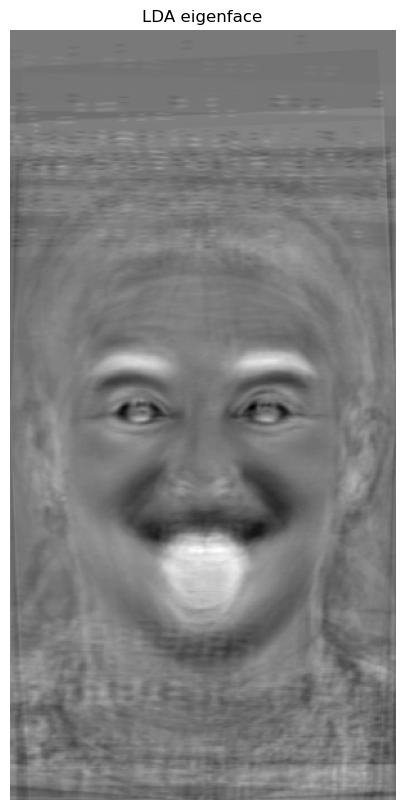

In [32]:
untransformes_lda_eigenfaces = pca.inverse_transform(lda_eigenfaces) - pca.mean_

# Plot the LDA eigenface
plt.figure(figsize=(10, 10))
plt.imshow(untransformes_lda_eigenfaces.reshape(Image_shape), cmap='gray')
plt.title('LDA eigenface')
plt.axis('off')
plt.show()


White spaces show the main focous of LDA. The main idea is, eyebrows and mouth are the most important features to distinguish between happy and suprised faces. When a person is happy, the eyebrows are raised and the mouth is smiling. When a person is surprised, the eyebrows are raised and the mouth is open. Thus the eyebrows and mouth are white in the LDA plot.

In [64]:
def pca_fitter(train_data, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(train_data)
    transformed_faces = pca.transform(train_data)
    return pca, transformed_faces

def loss_calculator(labels, predicted_labels):
    return np.mean(labels != predicted_labels)

def lda_fitter(train_data, train_labels, test_data, test_labels):
    lda = LDA(n_components=1)
    lda.fit(train_data, train_labels)
    predicted_labels = lda.predict(train_data)
    lda_loss_train = loss_calculator(train_labels, predicted_labels)
    predicted_labels = lda.predict(test_data)
    lda_loss_test = loss_calculator(test_labels, predicted_labels)
    return lda, lda_loss_train, lda_loss_test

def knn_fitter(train_data, train_labels, n_neighbors, test_data, test_data_labels):
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(train_data, train_labels)
    predicted_labels = knn.predict(train_data)
    knn_loss_train = loss_calculator(train_labels, predicted_labels)
    predicted_labels = knn.predict(test_data)
    knn_loss_test = loss_calculator(test_data_labels, predicted_labels)
    return knn, knn_loss_train, knn_loss_test

def handler(train_superise_images, train_happy_images,
            test_superise_images, test_happy_images):
    n_PCA_components = np.arange(1, 50, 5)
    n_neighbors = np.arange(1, 6, 2)
    lda_losses_train = []
    knn_losses_train = []
    lda_losses_test = []
    knn_losses_test = []
    train_data = np.concatenate((train_superise_images, train_happy_images), axis=0)
    train_labels = np.array([0] * len(train_superise_images) + [1] * len(train_happy_images))
    test_data = np.concatenate((test_superise_images, test_happy_images), axis=0)
    test_labels = np.array([0] * len(test_superise_images) + [1] * len(test_happy_images))
    for n_components in n_PCA_components:
        pca, transformed_faces = pca_fitter(train_data, n_components)
        test_data_transformed = pca.transform(test_data)
        lda, lda_loss_train, lda_loss_test = lda_fitter(transformed_faces, train_labels, test_data_transformed, test_labels)
        lda_losses_train.append(lda_loss_train)
        lda_losses_test.append(lda_loss_test)
        knn_loss_temp_train = []
        knn_loss_temp_test = []
        for i in n_neighbors:
            knn, knn_loss_train, knn_loss_test = knn_fitter(transformed_faces, train_labels, i, test_data_transformed, test_labels)
            knn_loss_temp_train.append(knn_loss_train)
            knn_loss_temp_test.append(knn_loss_test)
        knn_losses_train.append(knn_loss_temp_train)
        knn_losses_test.append(knn_loss_temp_test)
    return lda_losses_train, lda_losses_test, knn_losses_train, knn_losses_test

In [65]:
lda_losses_train, lda_losses_test, knn_losses_train, knn_losses_test = handler(train_superise_images, train_happy_images, test_superise_images, test_happy_images)

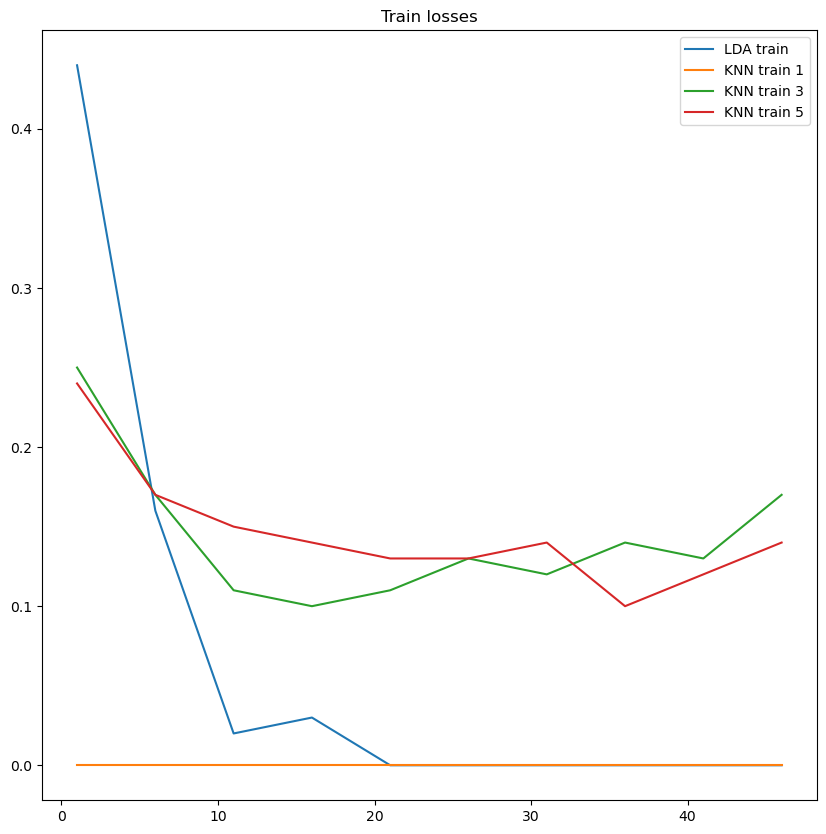

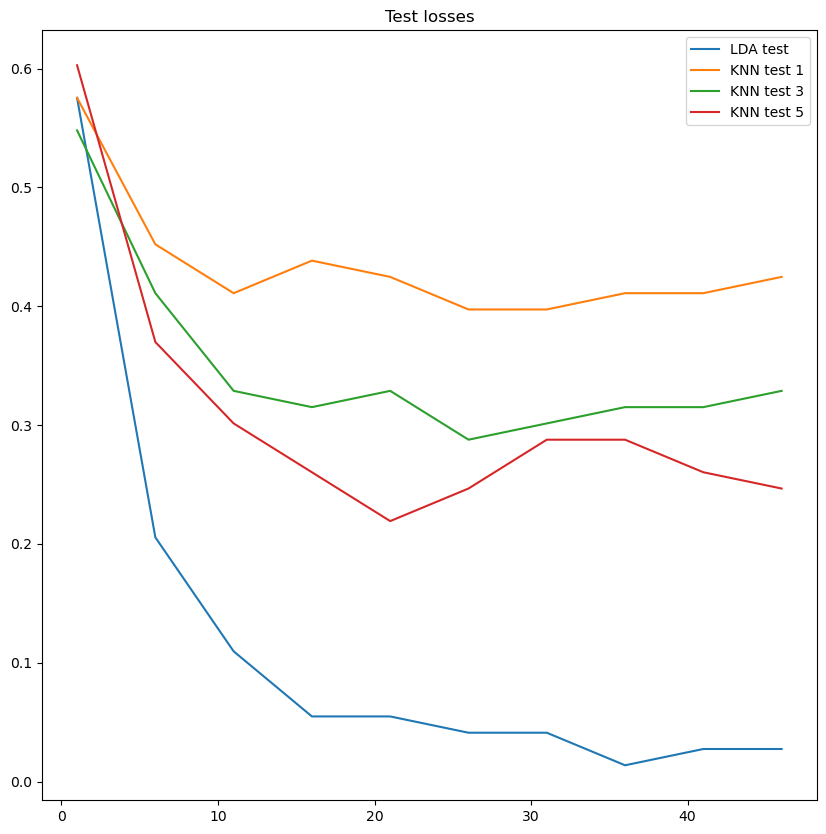

In [68]:
# # Plot the losses
# plt.figure(figsize=(10, 10))
# plt.plot(np.arange(1, 50, 5), lda_losses_train, label='LDA train')
# plt.plot(np.arange(1, 50, 5), lda_losses_test, label='LDA test')
# plt.legend()
# plt.title('LDA losses')

# plt.figure(figsize=(10, 10))
# for i in range(len(knn_losses_train[0])):
#     plt.plot(np.arange(1, 50, 5), [x[i] for x in knn_losses_train], label=f'KNN train {2*i+1}')
#     plt.plot(np.arange(1, 50, 5), [x[i] for x in knn_losses_test], label=f'KNN test {2*i+1}')
# plt.legend()
# plt.title('KNN losses')
# plt.show()
# # Plot train losses
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, 50, 5), lda_losses_train, label='LDA train')
for i in range(len(knn_losses_train[0])):
    plt.plot(np.arange(1, 50, 5), [x[i] for x in knn_losses_train], label=f'KNN train {2*i+1}')
plt.legend()
plt.title('Train losses')
plt.show()

# Plot test losses
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, 50, 5), lda_losses_test, label='LDA test')
for i in range(len(knn_losses_test[0])):
    plt.plot(np.arange(1, 50, 5), [x[i] for x in knn_losses_test], label=f'KNN test {2*i+1}')
plt.legend()
plt.title('Test losses')
plt.show()
